# Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [5]:
# df_1 represents Dataset_C18pop
df_1 = pd.read_csv('Dataset_C18pop_1.csv')
df_1.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,DepIndex
0,3,1.0,"236 Kaiaraara Bay Road Great Barrier Island, A...",5638,580000,-36.177655,175.359070,7001130,39,9,18,24,24,42,Great Barrier Island (Aotea Island),153,9
1,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,Great Barrier Island (Aotea Island),156,9
2,5,3.0,"349 Blind Bay Road Great Barrier Island, Auckland",3953,920000,-36.257895,175.436448,7001131,27,6,6,18,39,60,Great Barrier Island (Aotea Island),156,9
3,2,2.0,"8 Omanawa Lane Great Barrier Island, Auckland",8638,650000,-36.305955,175.492424,7001135,30,21,21,21,39,69,Great Barrier Island (Aotea Island),201,9
4,3,1.0,"358 Mangawhai Road Wellsford, Auckland",15550,550000,-36.228742,174.545810,7001139,48,30,21,21,33,45,Wellsford,195,5


In [6]:
df_1.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area        int64
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
C18_CURPop       int64
DepIndex         int64
dtype: object

In [7]:
df_1.isnull().values.any()

True

In [8]:
df_1.Bathrooms.isnull().values.any()

True

In [10]:
#clean up NaN values
df_1 = df_1[df_1.Bathrooms.notnull()]

In [11]:
df_1.isnull().values.any()

False

In [12]:
df_1.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPop,DepIndex
count,1049.000000,1049.000000,1049.000000,1.049000e+03,1049.000000,1049.000000,1.049000e+03,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,3.776930,2.073403,858.185891,1.387926e+06,-36.893897,174.799615,7.006327e+06,47.525262,28.893232,26.979981,24.125834,22.612965,29.382269,179.776930,5.069590
std,1.170487,0.992985,1589.433957,1.184027e+06,0.130158,0.119468,2.587674e+03,24.709758,20.995139,17.934747,10.953205,10.220137,21.820173,71.057174,2.913171
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,323.000000,7.800000e+05,-36.950722,174.722474,7.004424e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,572.000000,1.080000e+06,-36.893368,174.798648,7.006333e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.856192,174.880945,7.008385e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,207.000000,8.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45d4fe00b8>,
      dtype=object)

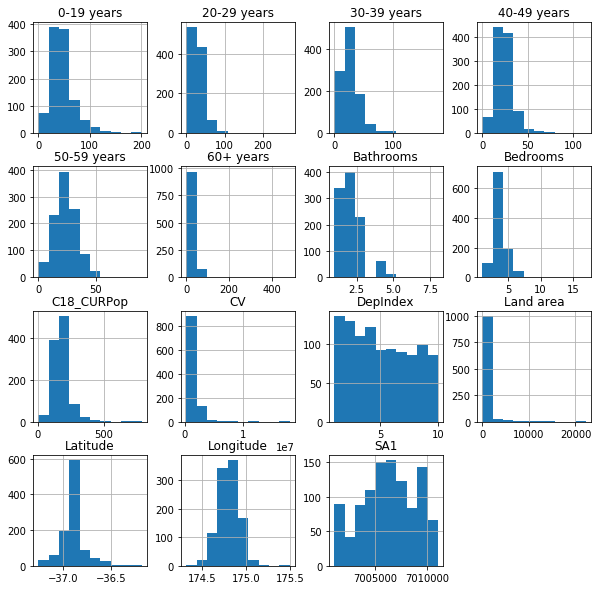

In [13]:
df_1.hist(figsize=(10,10))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


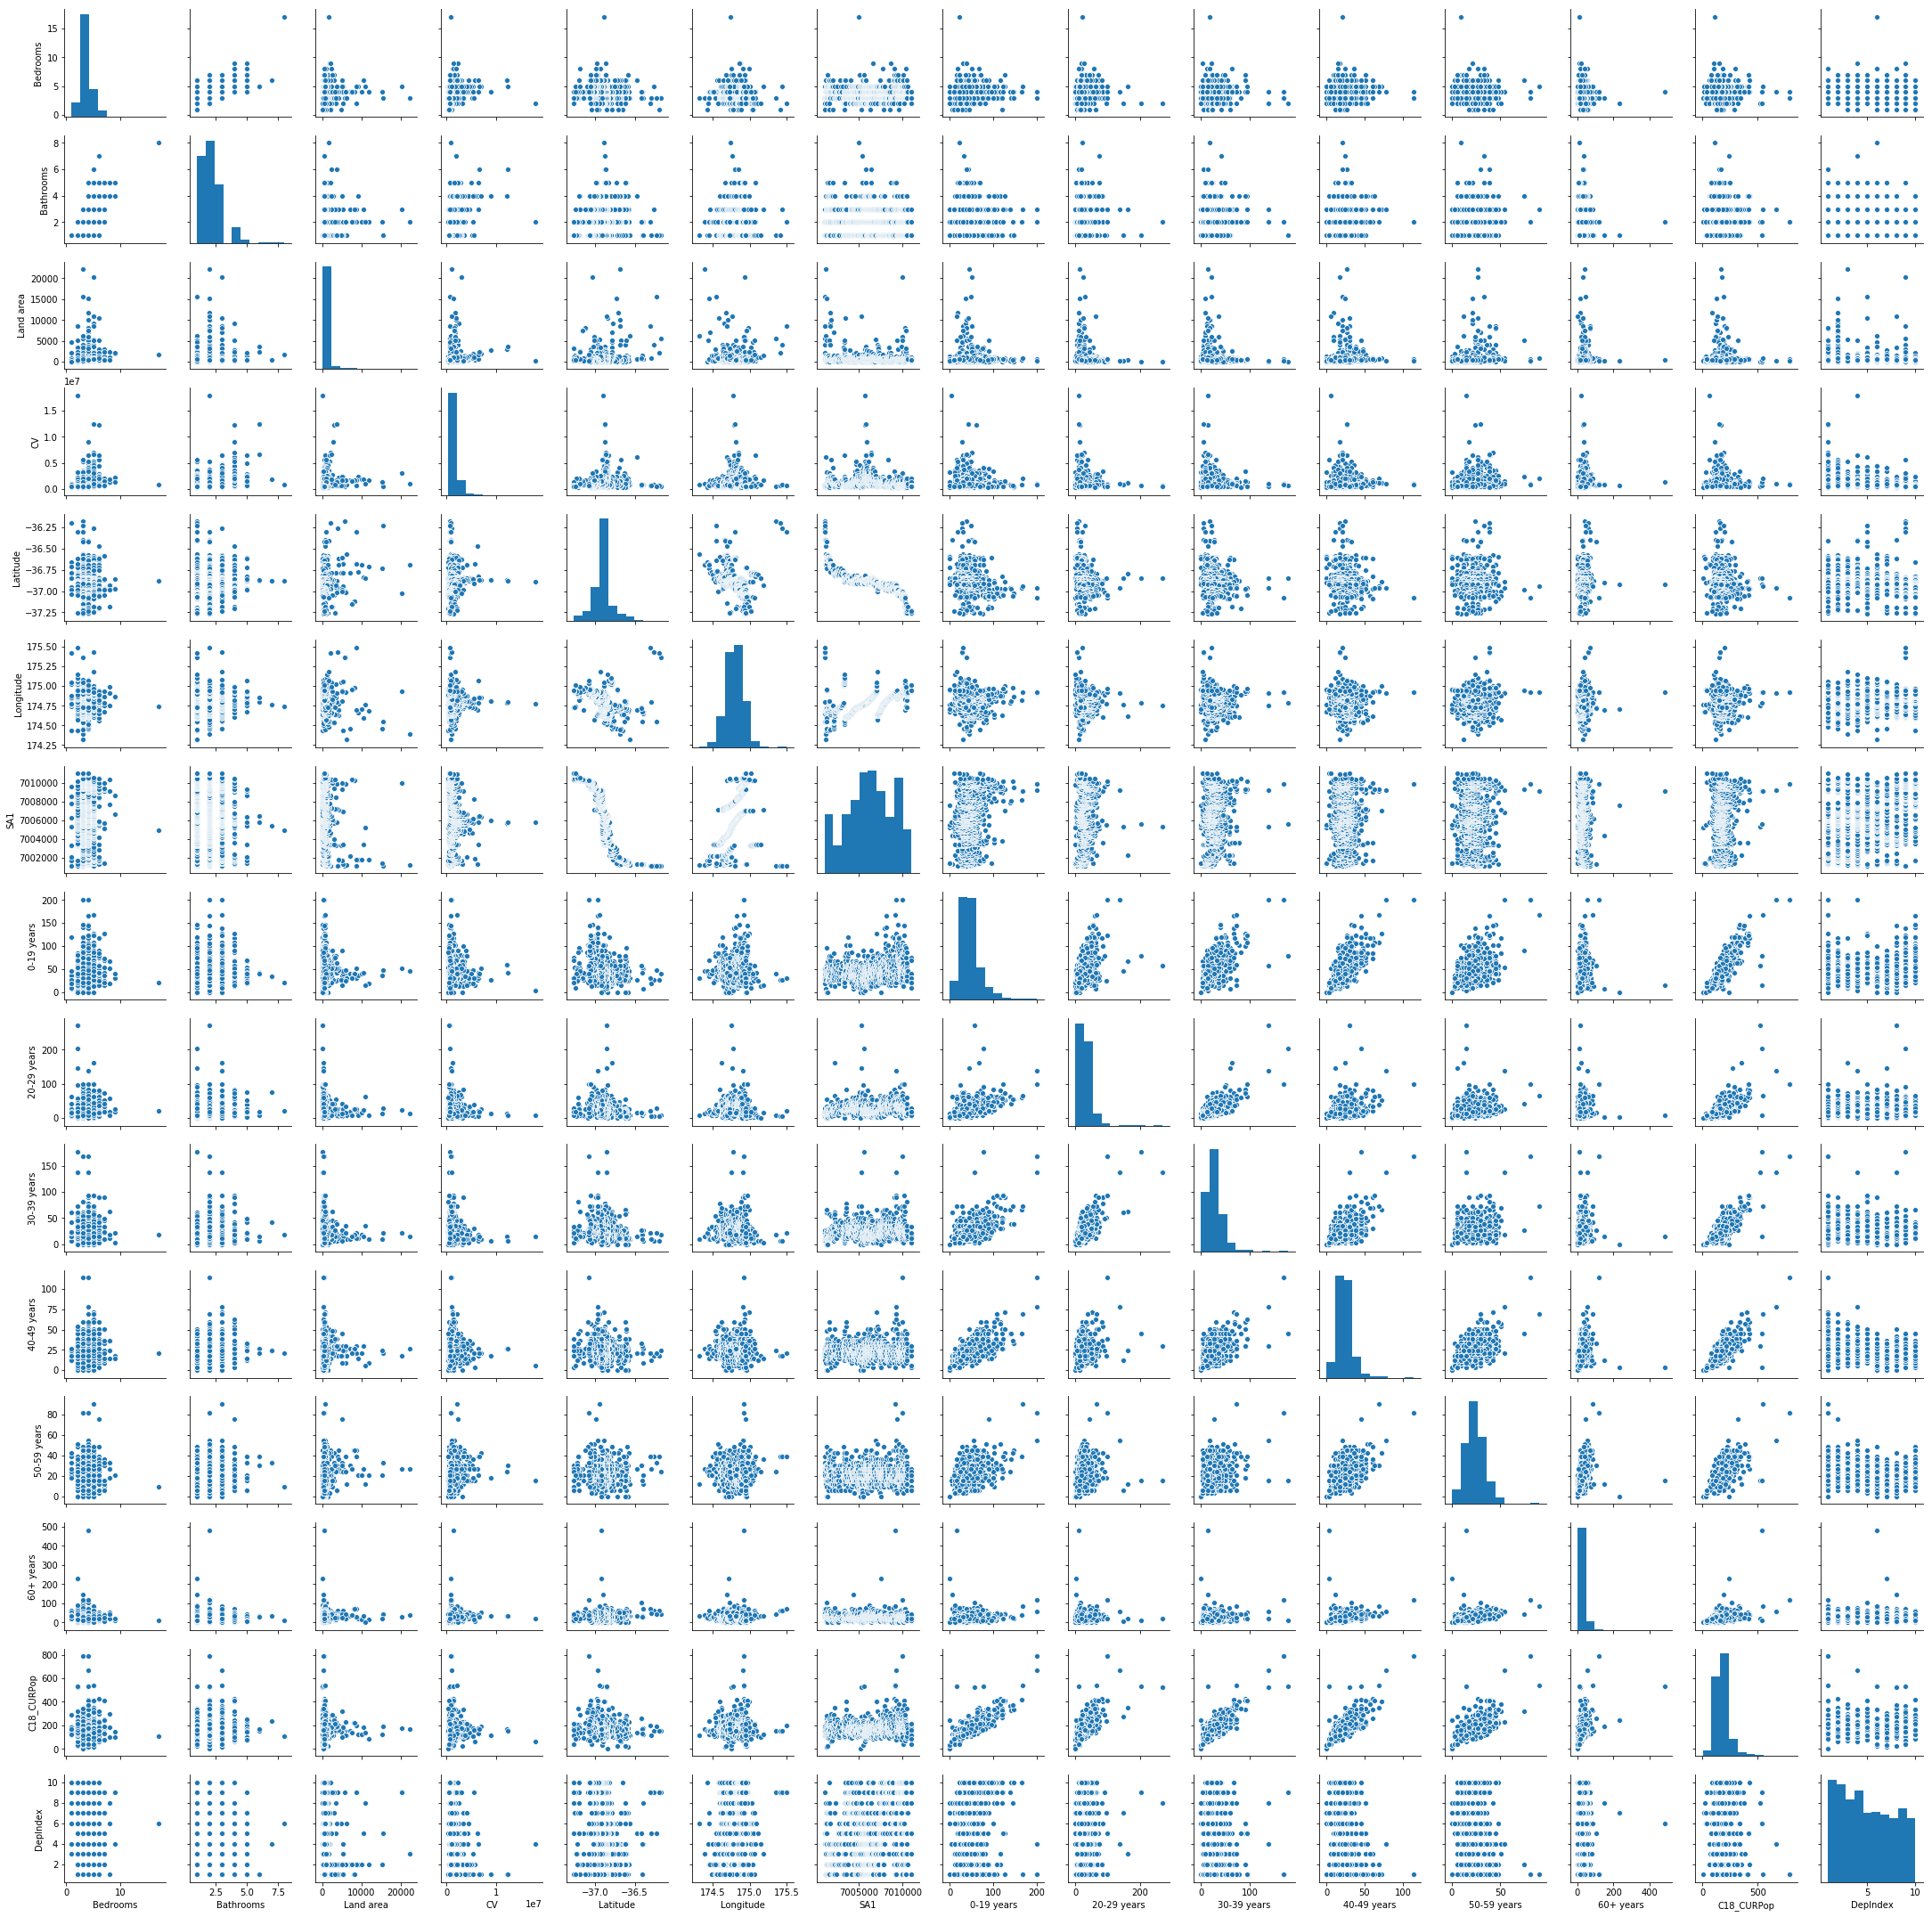

In [14]:
sns.pairplot(df_1, size = 2.0)

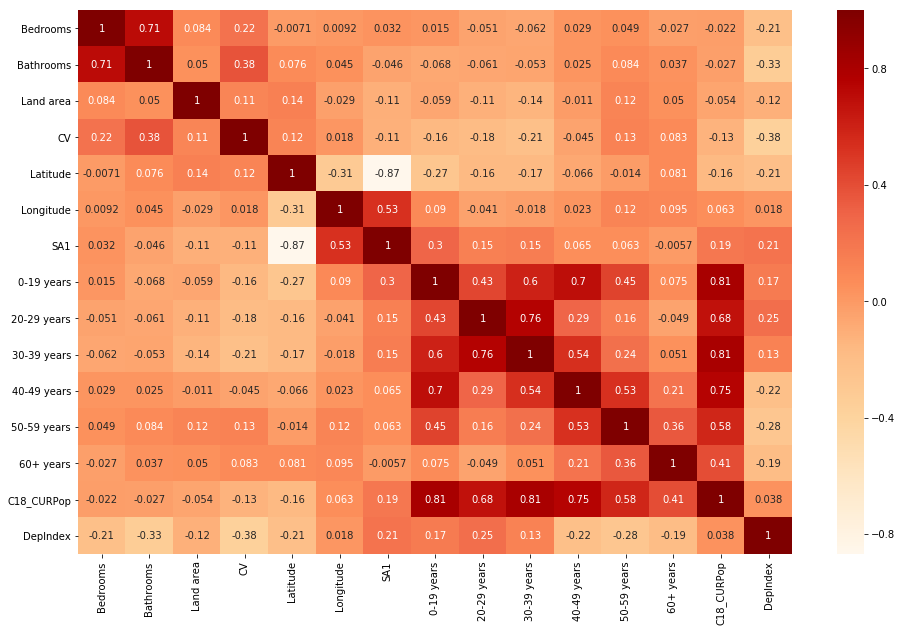

In [15]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = df_1.corr()
sns.heatmap(correlation_matrix,annot = True, cmap = "OrRd")

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


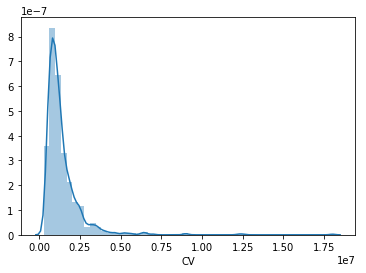

In [16]:
sns.distplot(df_1['CV'])

# Data Processing

From the CV histgraph above we notice some extreme value above 8M, there's part of hours should not be include in our estimation. As it is a single case and cast a extreme values. Similar cases include 15 bedrooms, more than 6 bathrooms, land area more than 16000, and Population more than 600.

In [17]:
df_1 = df_1.rename({'Land area':'LandArea'},axis=1)
df_1 = df_1[df_1.CV<8000000]
df_1 = df_1[df_1.LandArea<16000]
df_1 = df_1[df_1.Bedrooms<10]
df_1 = df_1[df_1.Bathrooms<= 6]
df_1 = df_1[df_1.C18_CURPop<8000000]

The scale of the training data need to be adjust as the CV price is millions based and it exceed the calculation range for float.

In [19]:
def ScaleAdjust (num):
    return float(num)/1000

df_drop = df_1.drop(['Address','Suburbs'],axis=1)

for column in df_drop.columns:
    df_drop[column] = df_drop[column].apply(ScaleAdjust)

In [38]:
# separate it to train and test by 7:3
x = df_drop.drop(['CV'],axis = 1)
y = df_drop['CV'] 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.3, random_state = 22)

# Linear Regresssion
Linear Regression isn't the best fit model in the situation. As it can hardly justify the impact of area code, such as "SA1", and how longititue and Latitute contributed to the final output. The location has strong impact on people decision to purchase houses but it can hardly to be linearly quantify. 

In [39]:
linear_model = LinearRegression()
linear_model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
linear_model.coef_

array([ 1.18475309e+04,  2.80552411e+05, -7.31442092e+00, -5.96570762e+04,
        3.88543570e+05, -3.43679564e+01,  3.12183490e+03,  3.94489978e+03,
       -6.72674231e+03, -6.20698879e+03,  1.30256811e+04,  2.68116981e+03,
       -2.11761880e+03, -9.44175305e+04])

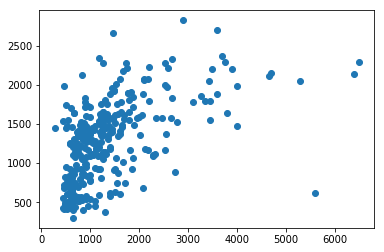

In [41]:
linear_predicted = linear_model.predict(test_x)
plt.scatter (test_y,linear_predicted)

In [42]:
linear_model.score(test_x,test_y)

0.28981868462074956

# Random Forest Regression

Random Forest Regression will address the problem listing above. Because it has decision trees to help analyse the influence of area code. And the random forest Regression allow a small sample splits, thus, it can better handle extreme training case compare to Linear Regression. 

In [43]:
RFR_model = RandomForestRegressor(n_estimators=100,max_features = 10)
RFR_model.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

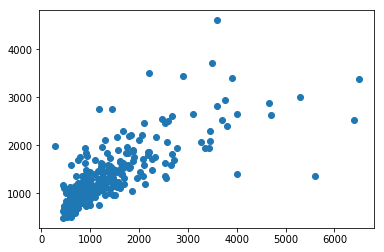

In [44]:
RFR_predicted = RFR_model.predict(test_x)
plt.scatter(test_y,RFR_predicted)

In [45]:
RFR_model.score(test_x,test_y)

0.5629860202264829